In [1]:
pip install pandas==1.1.5

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec

In [2]:
print(pd.__version__)

1.1.5


In [3]:
raw = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/orphan_toxins/orphan_at_results/summary_per_strain.csv')
raw.head()

,Name,Num_new_hits,IDs
0,ST000730224,45,44H(NZ_CP031256.1:minus:1302110:1302505);1H(NZ...
1,ST000730280,35,1H(NZ_JAAJTV010000001.1:minus:838713:839027);6...
2,ST000110517,49,1H(NZ_CP038363.1:minus:3667478:3667851);1H(NZ_...
3,ST006480029,28,5H(NZ_NHQA01000010.1:minus:175830:176049);11H(...
4,ST000110470,50,1H(NZ_CP045863.1:plus:2383807:2384180);1H(NZ_C...


In [4]:
raw.columns

Index(['Name', ' Num_new_hits', ' IDs'], dtype='object')

## <b> Average

In [5]:
#Add ST column
raw_d =raw.copy()
raw_d['ST'] = raw_d['Name'].str[2:-4].astype(int)
first_column = raw_d.pop('ST')
raw_d.insert(0, 'ST', first_column)
raw_d.head(3)

,ST,Name,Num_new_hits,IDs
0,73,ST000730224,45,44H(NZ_CP031256.1:minus:1302110:1302505);1H(NZ...
1,73,ST000730280,35,1H(NZ_JAAJTV010000001.1:minus:838713:839027);6...
2,11,ST000110517,49,1H(NZ_CP038363.1:minus:3667478:3667851);1H(NZ_...


In [6]:
raw_d[' Num_new_hits'].sum()

40506

In [7]:
# Group the data by sequence type and calculate the average
averages = raw_d.groupby('ST')[' Num_new_hits'].mean()
averages = averages.to_frame().reset_index()

In [8]:
averages

,ST,Num_new_hits
0,10,39.960000
1,11,48.480000
2,12,38.408163
3,38,48.200000
4,48,35.180000
5,58,42.500000
6,69,40.420000
7,73,45.700000
8,95,40.820000
9,101,40.400000


In [9]:
averages.columns

Index(['ST', ' Num_new_hits'], dtype='object')

In [10]:
averages['ST'] = 'ST' + averages['ST'].astype(str)

Text(0, 0.5, 'Orphan antitoxins (average)')

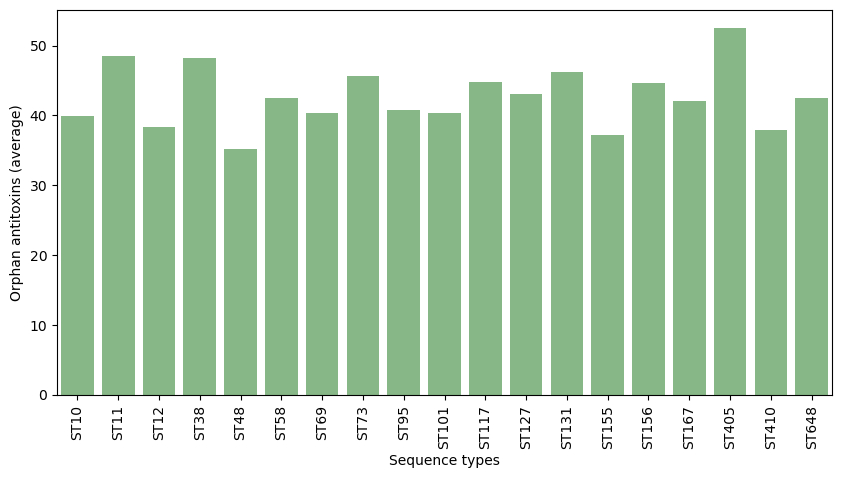

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include rows where Num_new_hits > 0
filtered_df = averages[averages[' Num_new_hits'] > 0]

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot a bar chart with error bars
ax = sns.barplot(x="ST", y=" Num_new_hits", data=averages,color='green', alpha = 0.5)

# Rotate x-axis labels and set their size
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('Sequence types')
ax.set_ylabel('Orphan antitoxins (average)')
# Display the plot
#plt.show()
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/main/orphans.tiff', dpi=300)



## <b> heatmap

In [16]:
original_hits = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/hits.csv')

In [17]:
original_hits.head()

,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
original_hits.columns = original_hits.columns.str.split('-').str[0]

In [21]:
original_hits.set_index('Strain')

,1H,2H,3H,4H,5H,6H,7H,8H,9H,10H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,2,1,1,1,1,1,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST000730066,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST004050104,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000100860,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
original_hits.columns 

Index(['Strain', '1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H',
       ...
       '160H', '161H', '162H', '163H', '164H', '165H', '166H', '167H', '168H',
       '169H'],
      dtype='object', length=170)

In [23]:
raw.head(2)

,Name,Num_new_hits,IDs
0,ST000730224,45,44H(NZ_CP031256.1:minus:1302110:1302505);1H(NZ...
1,ST000730280,35,1H(NZ_JAAJTV010000001.1:minus:838713:839027);6...


In [24]:
#separate individual partners and remove unwanted string
raw[' IDs'] = raw[' IDs'].str.split(';').apply(lambda x: [item.split('(')[0] for item in x])

In [25]:
raw.head(1)

,Name,Num_new_hits,IDs
0,ST000730224,45,"[44H, 1H, 1H, 1H, 6H, 141H, 39H, 17H, 17H, 8H,..."


In [26]:
#extract unique IDs
unique_ids = list(set([id for sublist in raw[' IDs'] for id in sublist]))
unique_ids.sort(key=lambda x: int(x.split('H')[0]))
len(unique_ids)

113

In [27]:
# Create a dictionary to store the presence of each unique ID
id_presence = {}
for id in unique_ids:
    id_presence[id] = []
    
# Iterate over each row and update the id_presence dictionary
for row in raw.itertuples():
    for id in unique_ids:
        if id in row[3]:
            id_presence[id].append(1)
        else:
            id_presence[id].append(0)
            
# Create a new dataframe with the id_presence dictionary
d = pd.DataFrame(id_presence)

In [28]:
d.head()

,1H,2H,4H,5H,6H,7H,8H,9H,10H,11H,...,143H,147H,150H,151H,154H,155H,163H,165H,168H,169H
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,0,0,1


In [29]:
# Add the original columns to the new dataframe
d['Strain'] = raw['Name']
d.head()

,1H,2H,4H,5H,6H,7H,8H,9H,10H,11H,...,147H,150H,151H,154H,155H,163H,165H,168H,169H,Strain
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,ST000730224
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,ST000730280
2,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,1,ST000110517
3,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,ST006480029
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,1,ST000110470


In [30]:
#presence absence
d = d.set_index('Strain')


In [31]:
column_sums = d.sum()
column_sums

1H      914
2H      949
4H      949
5H      944
6H      949
       ... 
155H      1
163H     14
165H      1
168H      1
169H    550
Length: 113, dtype: int64

In [32]:
original_hits

,Strain,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,ST000730066,3,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
946,ST004050104,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
947,ST000100860,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
948,ST001550161,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
column_order = original_hits.columns[1:171]

In [34]:
column_order 

Index(['1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H',
       ...
       '160H', '161H', '162H', '163H', '164H', '165H', '166H', '167H', '168H',
       '169H'],
      dtype='object', length=169)

In [35]:
# Sort the columns of df1 according to the column order of df2
d = d.reindex(columns=column_order)

# Add any missing columns in df1 with zero-filled values
missing_columns = set(column_order) - set(d.columns)
for column in missing_columns:
    df[column] = 0

# Update all the rows in df1 based on the column order
d = d[column_order]
d = d.fillna(0).astype(int)

In [36]:
d.head()

,1H,2H,3H,4H,5H,6H,7H,8H,9H,10H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
Strain,,,,,,,,,,,,,,,,,,,,,
ST000730224,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730280,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000110517,1,1,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
ST006480029,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000110470,1,1,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
d.sum()

1H      914
2H      949
3H        0
4H      949
5H      944
       ... 
165H      1
166H      0
167H      0
168H      1
169H    550
Length: 169, dtype: int64

In [38]:
#Save original datafram to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/Orphan_toxins.xlsx"
d.to_excel(path, sheet_name='Orphan_toxins')

In [39]:
#Add ST column
df = d.copy()
df['ST'] = df.index.str[2:-4].astype(int)
first_column = df.pop('ST')
df.insert(0, 'ST', first_column)
df.head(3)

,ST,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
Strain,,,,,,,,,,,,,,,,,,,,,
ST000730224,73,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730280,73,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000110517,11,1,1,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1


In [40]:
#total no of toxins 
a= df.reset_index()
a = a.drop('Strain', axis = 1)
a = a.set_index('ST')
a_sum = a.sum(axis = 1)
a_sum = a_sum.to_frame()
a_sum.rename(columns = {0:'Total no of orphan_antitoxins'}, inplace = True)
a_sum = a_sum.reset_index()
a_sum['ST'] = 'ST' + a_sum['ST'].astype(str)
a_sum.head()

,ST,Total no of orphan_antitoxins
0,ST73,25
1,ST73,22
2,ST11,32
3,ST648,24
4,ST11,32


In [41]:
a_sum.shape

(949, 2)

In [42]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of orphan_antitoxins                                          \
                              count       mean       std   min    25%   50%   
ST                                                                            
ST10                           50.0  27.740000  2.521823  20.0  27.00  27.0   
ST101                          50.0  28.840000  3.364642  24.0  26.25  28.0   
ST11                           50.0  32.220000  1.217056  28.0  32.00  32.0   
ST117                          50.0  25.320000  2.325019  22.0  23.00  25.0   
ST12                           49.0  22.755102  2.146029  19.0  21.00  23.0   
ST127                          50.0  24.980000  2.551430  20.0  23.00  24.0   
ST131                          50.0  29.500000  1.705334  26.0  29.00  29.0   
ST155                          50.0  28.160000  1.888310  24.0  27.00  28.0   
ST156                          50.0  28.680000  2.298535  24.0  27.00  29.0   
ST167                          50.0  30.200000  2.390457  24.0  29.00  31.0   
ST38                           50.0  31.240000  2.832465  26.0  30.00  31.0   
ST405                          50.0  34.420000  2.339457  28.0  33.00  35.0   
ST410                          50.0  26.920000  2.354674  21.0  26.00  28.0   
ST48                           50.0  26.020000  2.307839  21.0  25.00  26.0   
ST58                           50.0  28.480000  2.392505  24.0  26.25  28.0   
ST648                          50.0  28.000000  3.187988  24.0  25.00  27.0   
ST69                           50.0  26.880000  2.086301  20.0  26.00  27.0   
ST73                           50.0  25.060000  2.350944  22.0  23.25  25.0   
ST95                           50.0  26.840000  2.698148  21.0  25.00  27.0   

                    
         75%   max  
ST                  
ST10   29.00  35.0  
ST101  31.00  35.0  
ST11   32.00  36.0  
ST117  27.00  30.0  
ST12   24.00  27.0  
ST127  27.00  31.0  
ST131  31.00  33.0  
ST155  29.00  32.0  
ST156  30.00  34.0  
ST167  32.00  35.0  
ST38   33.00  41.0  
ST405  36.00  39.0  
ST410  28.00  31.0  
ST48   28.00  30.0  
ST58   29.75  35.0  
ST648  30.75  35.0  
ST69   28.00  32.0  
ST73   26.00  32.0  
ST95   29.00  33.0

Text(0, 0.5, 'No of toxins')

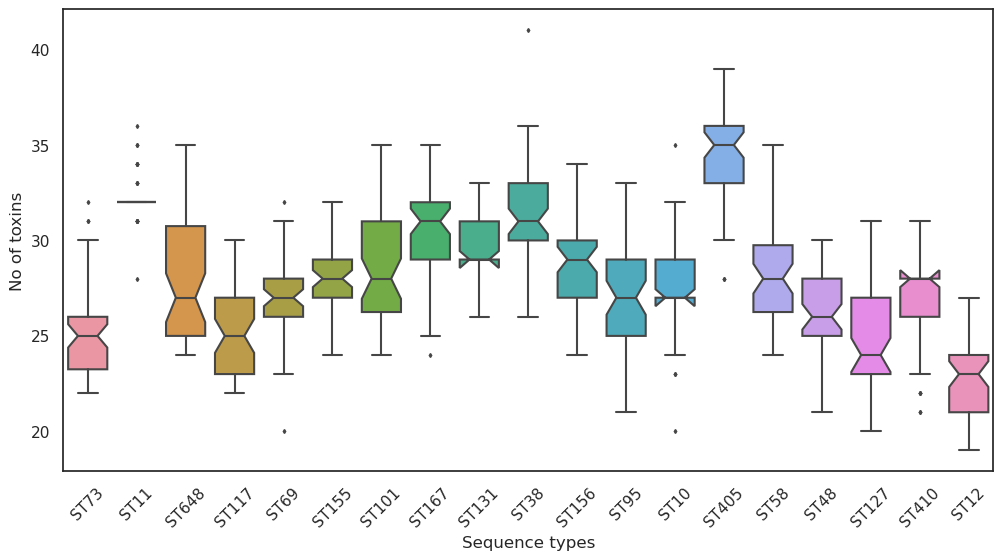

In [43]:
#Boxpllot 
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("white")
sns.boxplot(data=a_sum, x = 'ST', y = 'Total no of orphan_antitoxins', notch=True, fliersize=2, whis=1.5)
plt.xlabel("Sequence types")
plt.xticks(rotation=45)
plt.ylabel("No of toxins")

In [44]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of orphan_antitoxins                                          \
                              count       mean       std   min    25%   50%   
ST                                                                            
ST10                           50.0  27.740000  2.521823  20.0  27.00  27.0   
ST101                          50.0  28.840000  3.364642  24.0  26.25  28.0   
ST11                           50.0  32.220000  1.217056  28.0  32.00  32.0   
ST117                          50.0  25.320000  2.325019  22.0  23.00  25.0   
ST12                           49.0  22.755102  2.146029  19.0  21.00  23.0   
ST127                          50.0  24.980000  2.551430  20.0  23.00  24.0   
ST131                          50.0  29.500000  1.705334  26.0  29.00  29.0   
ST155                          50.0  28.160000  1.888310  24.0  27.00  28.0   
ST156                          50.0  28.680000  2.298535  24.0  27.00  29.0   
ST167                          50.0  30.200000  2.390457  24.0  29.00  31.0   
ST38                           50.0  31.240000  2.832465  26.0  30.00  31.0   
ST405                          50.0  34.420000  2.339457  28.0  33.00  35.0   
ST410                          50.0  26.920000  2.354674  21.0  26.00  28.0   
ST48                           50.0  26.020000  2.307839  21.0  25.00  26.0   
ST58                           50.0  28.480000  2.392505  24.0  26.25  28.0   
ST648                          50.0  28.000000  3.187988  24.0  25.00  27.0   
ST69                           50.0  26.880000  2.086301  20.0  26.00  27.0   
ST73                           50.0  25.060000  2.350944  22.0  23.25  25.0   
ST95                           50.0  26.840000  2.698148  21.0  25.00  27.0   

                    
         75%   max  
ST                  
ST10   29.00  35.0  
ST101  31.00  35.0  
ST11   32.00  36.0  
ST117  27.00  30.0  
ST12   24.00  27.0  
ST127  27.00  31.0  
ST131  31.00  33.0  
ST155  29.00  32.0  
ST156  30.00  34.0  
ST167  32.00  35.0  
ST38   33.00  41.0  
ST405  36.00  39.0  
ST410  28.00  31.0  
ST48   28.00  30.0  
ST58   29.75  35.0  
ST648  30.75  35.0  
ST69   28.00  32.0  
ST73   26.00  32.0  
ST95   29.00  33.0

In [45]:
df.shape

(949, 170)

In [46]:
#group by ST
genes =df.groupby(by=['ST'])

In [47]:
genes.head()

,ST,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
Strain,,,,,,,,,,,,,,,,,,,,,
ST000730224,73,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730280,73,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000110517,11,1,1,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
ST006480029,648,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000110470,11,1,1,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST000120027,12,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000120067,12,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000120010,12,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Write data from groups into individual dataframes
df_list=[]
for i in genes.groups:
    tag='ST'+str(i)+'_df'
    #print(tag)
    df_list.append(tag)
    globals()[tag] =pd.DataFrame(genes.get_group(i))
    print("Shape of {}:\t{}".format(tag,globals()[tag].shape))

Shape of ST10_df:	(50, 170)
Shape of ST11_df:	(50, 170)
Shape of ST12_df:	(49, 170)
Shape of ST38_df:	(50, 170)
Shape of ST48_df:	(50, 170)
Shape of ST58_df:	(50, 170)
Shape of ST69_df:	(50, 170)
Shape of ST73_df:	(50, 170)
Shape of ST95_df:	(50, 170)
Shape of ST101_df:	(50, 170)
Shape of ST117_df:	(50, 170)
Shape of ST127_df:	(50, 170)
Shape of ST131_df:	(50, 170)
Shape of ST155_df:	(50, 170)
Shape of ST156_df:	(50, 170)
Shape of ST167_df:	(50, 170)
Shape of ST405_df:	(50, 170)
Shape of ST410_df:	(50, 170)
Shape of ST648_df:	(50, 170)


In [49]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [50]:
ST12_df.head(2)

,ST,1H,2H,3H,4H,5H,6H,7H,8H,9H,...,160H,161H,162H,163H,164H,165H,166H,167H,168H,169H
Strain,,,,,,,,,,,,,,,,,,,,,
ST000120027,12,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000120067,12,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
def t_percentage(k,tag):

    df_h=k.copy()
    #df_h.head()
    x=list(df_h.columns)
    #print(x)
    size=df_h.shape[0]
    #print(size)
    df_antitoxin=pd.DataFrame(columns=['antitoxins',tag])
    #print(df_antitoxin.head())
    for i in x:
        #print(df_h[i])
        s=df_h[i].astype(int).sum()
        #print(s)
        p=(s/size)*100

        df_antitoxin = df_antitoxin.append({'antitoxins': i,tag:p}, ignore_index=True)



    return(df_antitoxin)

In [52]:
#Calculate percentage of gene presence in each ST
antitoxin_list=[]
for i in df_list:
    d=globals()[i].copy()
    d.drop('ST', axis=1,inplace=True)
    x=i.replace('df','at')
    y=i.replace('_df','')
    antitoxin_list.append(x)
    globals()[x]=t_percentage(d,y)
    print(x,globals()[x].shape)

ST10_at (169, 2)
ST11_at (169, 2)
ST12_at (169, 2)
ST38_at (169, 2)
ST48_at (169, 2)
ST58_at (169, 2)
ST69_at (169, 2)
ST73_at (169, 2)
ST95_at (169, 2)
ST101_at (169, 2)
ST117_at (169, 2)
ST127_at (169, 2)
ST131_at (169, 2)
ST155_at (169, 2)
ST156_at (169, 2)
ST167_at (169, 2)
ST405_at (169, 2)
ST410_at (169, 2)
ST648_at (169, 2)


In [142]:
def merge_dataframe(list):
    l=list.copy()
    x=l.pop(0)
    x_df=globals()[x]
    for i in l:
        x_df=pd.merge(x_df,globals()[i],how='outer',on='antitoxins').fillna(0)
    return(x_df)

In [143]:
# Merge the dataframes
at_df=merge_dataframe(antitoxin_list)
at_df.head(10)

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,1H,98.0,100.0,97.959184,96.0,92.0,94.0,98.0,100.0,100.0,90.0,100.0,100.0,100.0,94.0,94.0,98.0,98.0,80.0,100.0
1,2H,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,3H,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4H,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,5H,96.0,100.0,100.000000,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0
5,6H,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,7H,98.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,8H,98.0,100.0,2.040816,100.0,72.0,100.0,100.0,98.0,2.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.0
8,9H,82.0,100.0,0.000000,82.0,22.0,40.0,54.0,76.0,98.0,66.0,94.0,20.0,94.0,82.0,92.0,96.0,88.0,12.0,82.0
9,10H,98.0,2.0,100.000000,100.0,94.0,100.0,100.0,100.0,92.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,96.0,100.0,0.0


In [144]:
#Partner_annotation
h_annot = pd.read_csv('hits_pfam_annot_sorted.csv')
h_annot.head()

,short_name,Hit Id
0,1H-CbtA_toxin,1H
1,2H-Cpta_toxin,2H
2,3H-Polyketide_cyc2,3H
3,4H-Fic,4H
4,5H-GNAT_acetyltran,5H


In [145]:
h_annot.columns

Index(['short_name', 'Hit Id'], dtype='object')

In [146]:
at_df.rename(columns = {'antitoxins':'Hit Id'}, inplace =True)

In [147]:
#merge Pfam annotation
at_df=at_df.merge(h_annot, how='left', on='Hit Id')
at_df['Hit Id'] = '(' + at_df['Hit Id'] +')'

In [148]:
at_df['toxins'] = at_df['short_name'] + ' ' + at_df['Hit Id']
at_df[['k1', 'toxins']] = at_df['toxins'].str.split('-', n=1, expand=True)
at_df.drop(['short_name', 'Hit Id', 'k1'], axis = 1, inplace = True)

In [149]:
antitoxin_df=at_df.copy()
antitoxin_df.set_index('toxins',inplace=True)
antitoxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),98.0,100.0,97.959184,96.0,92.0,94.0,98.0,100.0,100.0,90.0,100.0,100.0,100.0,94.0,94.0,98.0,98.0,80.0,100.0
Cpta_toxin (2H),100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fic (4H),100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,100.000000,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0


In [150]:
#Ssave toxin percentages to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/Orphan_toxins.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
antitoxin_df.to_excel(writer, sheet_name = '%presence')
writer.save()
writer.close()

In [151]:
antitoxin_df.shape

(169, 19)

In [152]:
antitoxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),98.0,100.0,97.959184,96.0,92.0,94.0,98.0,100.0,100.0,90.0,100.0,100.0,100.0,94.0,94.0,98.0,98.0,80.0,100.0
Cpta_toxin (2H),100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fic (4H),100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,100.000000,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0


In [153]:
def select_rows(df):
    d1=df.copy()
    d2=pd.DataFrame()
    for index, row in d1.iterrows():
        score =0 
        #print(index)
        for i in d1.columns:
            
            if(row[i]>=20):
                #print(index, row[i] )
                score=score+1

        #print(index, score)
        
        if(score >0):
            d2=d2.append(d1.loc[index])
    return(d2)

In [154]:
new_df = select_rows(antitoxin_df)

In [155]:
new_df.shape

(66, 19)

In [156]:
new_df.head()

,ST10,ST101,ST11,ST117,ST12,ST127,ST131,ST155,ST156,ST167,ST38,ST405,ST410,ST48,ST58,ST648,ST69,ST73,ST95
CbtA_toxin (1H),98.0,90.0,100.0,100.0,97.959184,100.0,100.0,94.0,94.0,98.0,96.0,98.0,80.0,92.0,94.0,100.0,98.0,100.0,100.0
Cpta_toxin (2H),100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Fic (4H),100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,100.0,98.0,100.000000,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0
GNAT_acetyltran (6H),100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


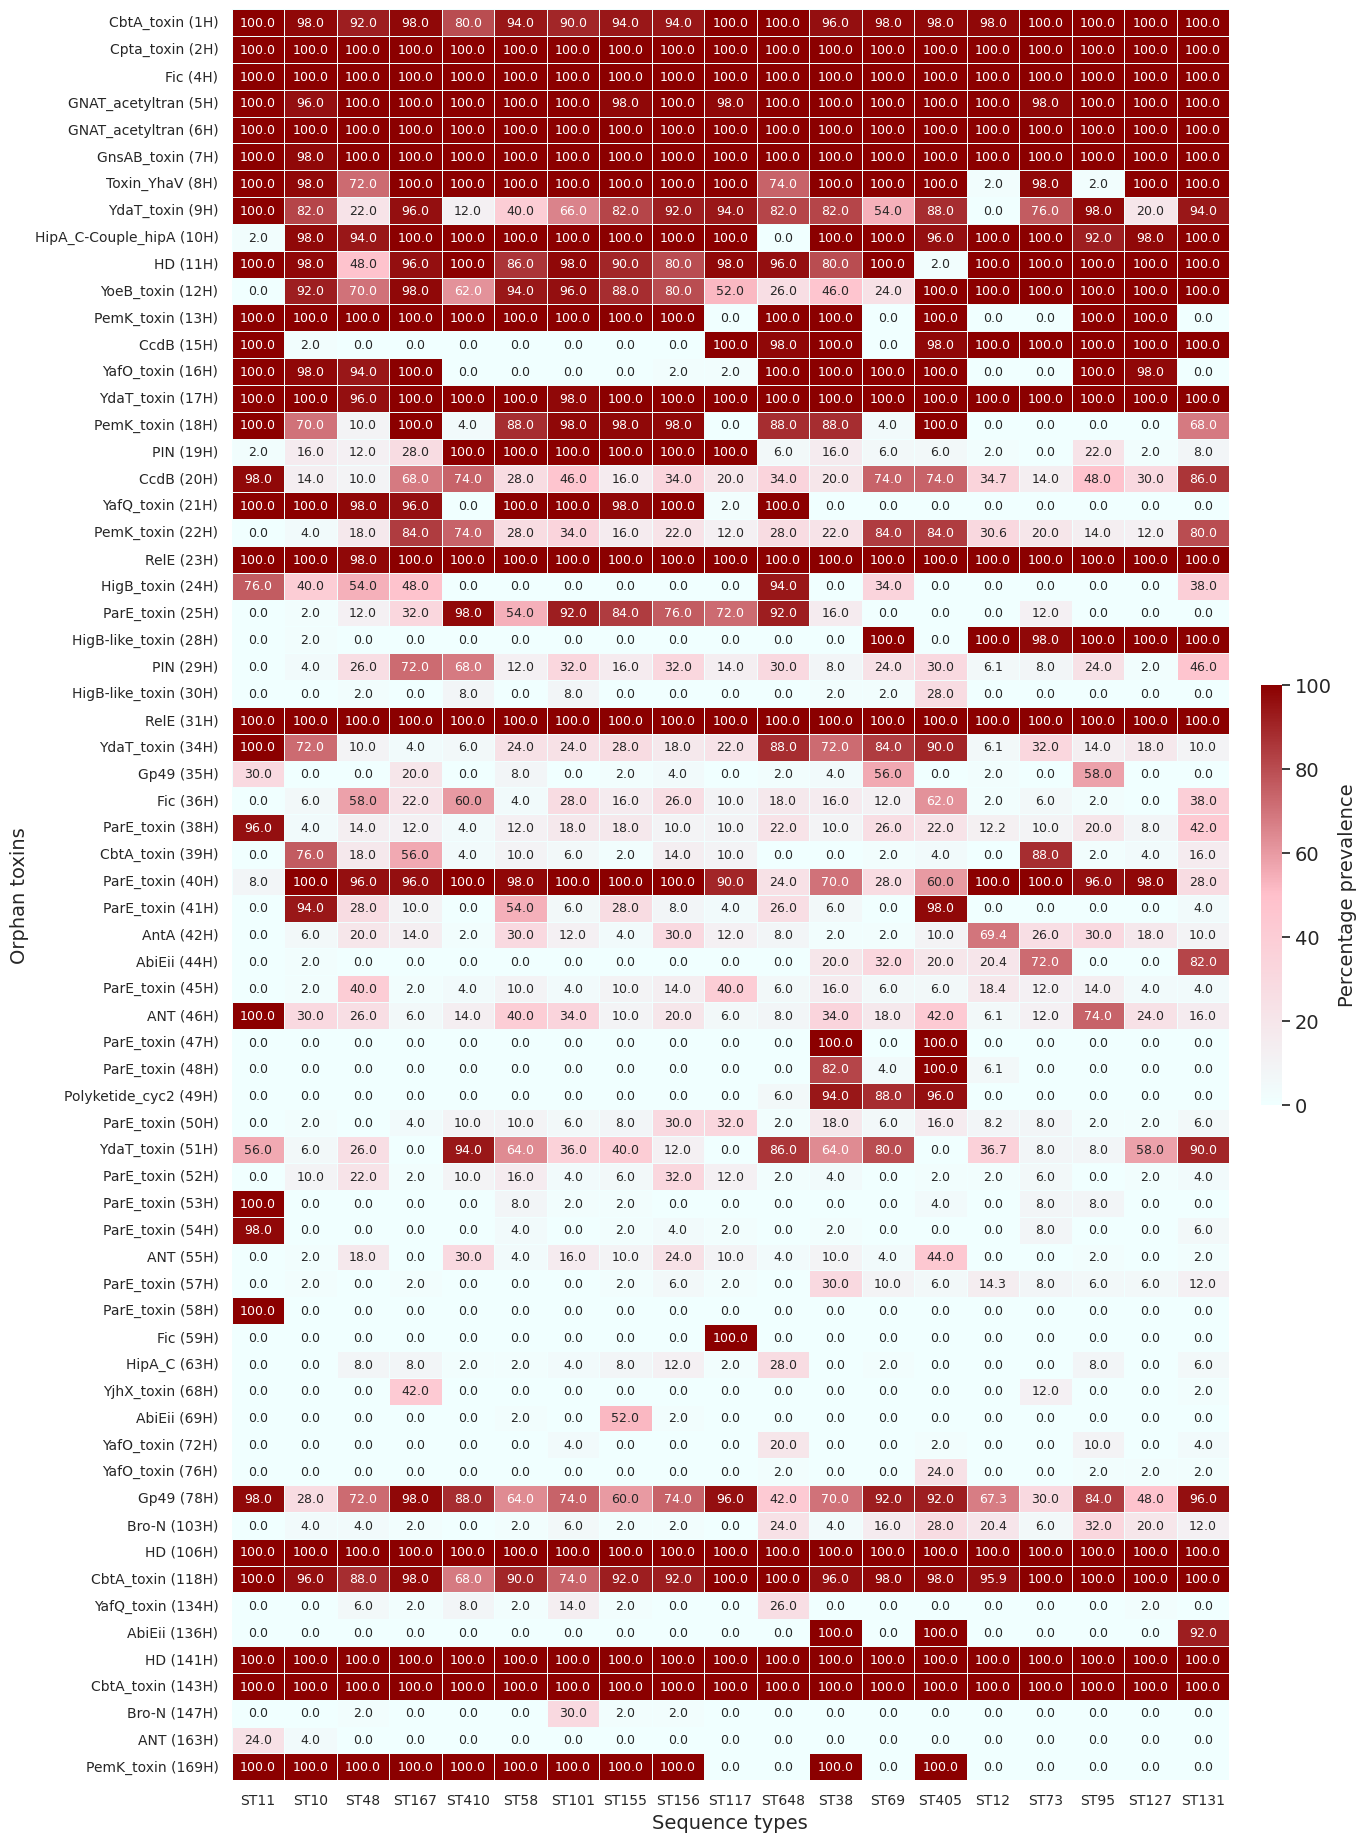

In [157]:
##For publication

# define ST order
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

# set font scale
sns.set(font_scale=0.8)

#set figure size 
plt.figure(figsize=(15, 23))

#ordered dataframe
new_df_order = new_df.reindex(columns=ST_new_order)

#set cmap
#cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
import matplotlib.colors as mcolors

# Adjust color points to create a smoother transition
colors = ['azure', 'pink', 'darkred'] 

cmap = mcolors.LinearSegmentedColormap.from_list('yellw_to_brown_to_blue', colors)

# create heat map
sns.heatmap(new_df_order, xticklabels = ST_new_order,
            cmap = cmap, annot=True,
            fmt='.1f',annot_kws={"size": 9},
             cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
            square=False, linewidths=0.5, linecolor='azure')

# Set colorbar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.yaxis.label.set_size(14)

#increase fontsize of x and y ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add x-label and y-label
plt.xlabel("Sequence types", fontsize = 14)
plt.ylabel("Orphan toxins", fontsize = 14)
plt.subplots_adjust(left=0.2)
# save and show the figure
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/antitoxins-heatmap.tiff',
            #dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/supplemantary/antitoxins-heatmap.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Sfig7.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/Sfig4.jpg', dpi=300)
#plt.show()